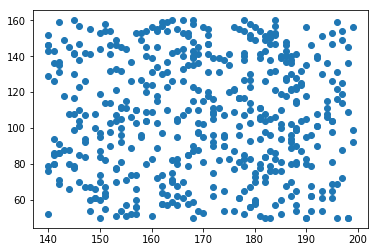

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("./500_Person_Gender_Height_Weight_Index.csv")
plt.scatter(np.array(data["Height"]), np.array(data["Weight"]))
plt.show()


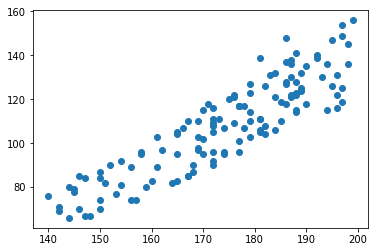

In [43]:
#Since, there is no relationship between height and weight, let's select a class of people(Underweight or overweight...)
data = data[data["Index"] == 4]
plt.scatter(np.array(data["Height"]), np.array(data["Weight"]))
plt.show()
data = data[["Height", "Weight"]]


In [44]:
#Feature Scaling
height_min = data["Height"].min()
height_max = data["Height"].max()
mean_height = data["Height"].mean()
data["Height"] = (data["Height"] - mean_height) / (height_max - height_min)

weight_min = data["Weight"].min()
weight_max = data["Weight"].max()
mean_weight = data["Weight"].mean()
data["Weight"] = (data["Weight"] - mean_weight) / (weight_max - weight_min)


0 131.859911042
1 129.272908615
2 126.737387488
3 124.252323183
4 121.81671161
5 119.429568658
6 117.089929803
7 114.796849713
8 112.549401869
9 110.346678188
10 108.18778866
11 106.071860986
12 103.998040224
13 101.965488447
14 99.973384402
15 98.0209231793
16 96.1073158866
17 94.2317893308
18 92.3935857052
19 90.5919622834
20 88.8261911194
21 87.0955587534
22 85.3993659231
23 83.7369272819
24 82.1075711214
25 80.5106391002
26 78.945485978
27 77.4114793546
28 75.9079994148
29 74.4344386775
30 72.9902017505
31 71.5747050902
32 70.1873767651
33 68.8276562255
34 67.4949940763
35 66.1888518556
36 64.9087018168
37 63.6540267155
38 62.4243196005
39 61.2190836088
40 60.0378317651
41 58.8800867848
42 57.7453808813
43 56.6332555771
44 55.5432615181
45 54.4749582926
46 53.4279142531
47 52.4017063417
48 51.3959199194
49 50.4101485987
50 49.443994079
51 48.497065986
52 47.5689817138
53 46.6593662703
54 45.7678521259
55 44.8940790648
56 44.0376940392
57 43.1983510274
58 42.3757108933
59 41.5694412

489 1.8657273171
490 1.8655855773
491 1.86544661001
492 1.86531036005
493 1.86517677335
494 1.8650457969
495 1.86491737878
496 1.86479146806
497 1.86466801485
498 1.86454697024
499 1.86442828631
500 1.86431191608
501 1.8641978135
502 1.86408593345
503 1.8639762317
504 1.8638686649
505 1.86376319057
506 1.86365976707
507 1.86355835358
508 1.86345891012
509 1.86336139746
510 1.8632657772
511 1.86317201168
512 1.86308006397
513 1.86298989792
514 1.86290147807
515 1.86281476966
516 1.86272973864
517 1.86264635163
518 1.86256457591
519 1.86248437943
520 1.86240573074
521 1.86232859906
522 1.8622529542
523 1.86217876656
524 1.86210600715
525 1.86203464755
526 1.8619646599
527 1.8618960169
528 1.86182869179
529 1.86176265835
530 1.86169789087
531 1.86163436416
532 1.86157205352
533 1.86151093477
534 1.86145098418
535 1.86139217851
536 1.86133449496
537 1.86127791122
538 1.86122240539
539 1.86116795603
540 1.86111454211
541 1.86106214303
542 1.86101073859
543 1.86096030901
544 1.86091083487
54

957 1.85759669442
958 1.85759427207
959 1.85759184998
960 1.85758942812
961 1.8575870065
962 1.85758458511
963 1.85758216395
964 1.85757974301
965 1.85757732228
966 1.85757490178
967 1.85757248148
968 1.85757006139
969 1.8575676415
970 1.85756522182
971 1.85756280232
972 1.85756038302
973 1.85755796391
974 1.85755554499
975 1.85755312624
976 1.85755070768
977 1.85754828929
978 1.85754587107
979 1.85754345302
980 1.85754103514
981 1.85753861742
982 1.85753619986
983 1.85753378245
984 1.85753136521
985 1.85752894811
986 1.85752653116
987 1.85752411436
988 1.85752169771
989 1.85751928119
990 1.85751686482
991 1.85751444858
992 1.85751203247
993 1.85750961649
994 1.85750720065
995 1.85750478493
996 1.85750236934
997 1.85749995387
998 1.85749753852
999 1.85749512329


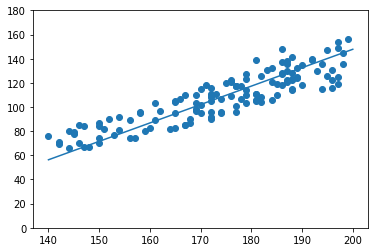

1.52438340429 -157.097364361


In [45]:
#f(x) = mx+b
#Cost function J = Sigma[ (fx - y)^2 ]/2n , n=number of samples 
m=1
b=1 #random initialisation
n = data.shape[0] #number of samples
def derivative_wrt_slope_m(m, b):
    sum = 0
    for index, row in data.iterrows():
        x = row["Height"]
        y = row["Weight"]
        fx = (m*x) + b
        sum += (fx-y)*x
    sum = sum/n
    return sum

def derivative_wrt_bias_b(m, b):
    sum = 0
    for index, row in data.iterrows():
        x = row["Height"]
        y = row["Weight"]
        fx = (m*x) + b
        sum += (fx-y)
    sum = sum/n
    return sum

alphab = 0.01
alpham = 0.00005
def cost(m,b):
    sum = 0
    for index, row in data.iterrows():
        x = row["Height"]
        y = row["Weight"]
        fx = (m*x) + b
        sum += (fx-y)**2
    return sum
        
for i in range(1000):
    print(i,cost(m, b)) 
    der_wrt_slope_m = derivative_wrt_slope_m(m, b)
    der_wrt_bias_b = derivative_wrt_bias_b(m, b) 
    m = m - (alpham * der_wrt_slope_m)
    b = b - (alphab * der_wrt_bias_b)

data["Height"] = ( data["Height"] * (height_max - height_min) ) + mean_height
data["Weight"] = ( data["Weight"] * (weight_max - weight_min) ) + mean_weight
temp_m = m
m = m*(weight_max - weight_min)/(height_max - height_min)
b = (b*(weight_max - weight_min)) + mean_weight - (temp_m*mean_height*(weight_max - weight_min)/(height_max - height_min))

x_points = [140,200]
y_points = [(140*m)+b,(200*m)+b] 

plt.scatter(np.array(data["Height"]), np.array(data["Weight"]))
axes = plt.gca()
axes.set_ylim([0,180])
plt.plot(x_points, y_points)
plt.show()
print(m, b)
